In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Lipinski import NumHDonors, NumHAcceptors, NumAromaticRings
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Crippen import MolLogP

In [93]:
with open('Downloads/mol-cycle-gan-master/GDB17.50000000LLnoSR.smi', 'rb') as file:
    non_inhibitors = [x.strip('\n') for x in file.readlines()]

In [94]:
non_inhibitors[0]

'BrC1=C2C3=C4C(CC3CCC2=O)C(=N)NC4=N1'

In [78]:
non_inhib_lengths = [len(x) for x in non_inibitors]
average_non_inhib_length = 1.0*sum(non_inhib_lengths)/len(non_inhib_lengths)

In [87]:
greater_than_40 = sum([1 if x > 40 else 0 for x in non_inhib_lengths])
print("Length of database: "+str(len(non_inhib_lengths)))
print(greater_than_40)

Length of database: 8346066
8925


In [230]:
pkidb = pd.read_excel('Downloads/mol-cycle-gan-master/pkidb.xlsx')

In [12]:
pkidb

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Abemaciclib,Verzenio,4.0,Eli Lilly,ChemSpider,'6ZV',5l2s,1.0,1.0,506.3,...,"On September 28, 2017, the Food and Drug Admin...",CDK4,CMGC,Smiles=CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc...,2017.0,US-7855211-B2,Achiral Molecule,LY2835219,Y,NaN
1,NaN,NaN,NaN,NaN,ChEMBL,NaN,NaN,NaN,NaN,NaN,...,NaN,CDK6,NaN,InChiKey=UZWDCWONPYILKI-UHFFFAOYSA-N,NaN,NaN,NaN,VERZENIO,NaN,NaN
2,NaN,NaN,NaN,NaN,PubChem,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LY-2835219,NaN,NaN
3,NaN,NaN,NaN,NaN,DrugBank,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,RCSB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PDBe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,Guide to Pharmacology,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,ZINC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,FDA SRS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,BindingDB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
temp = pkidb[pd.notnull(pkidb['Unnamed: 0'])]

In [20]:
temp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Abemaciclib,Verzenio,4.0,Eli Lilly,ChemSpider,'6ZV',5l2s,1.0,1.0,506.3,...,"On September 28, 2017, the Food and Drug Admin...",CDK4,CMGC,Smiles=CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc...,2017.0,US-7855211-B2,Achiral Molecule,LY2835219,Y,NaN
10,Abivertinib,NaN,3.0,ACEA Biosciences,ChemSpider,NaN,NaN,NaN,0.0,487.2,...,"AC0010 is an orally active, irreversible EGFR ...",NaN,NaN,Smiles=CN1CCN(CC1)c2ccc(cc2F)Nc3nc4c(cc[nH]4)c...,NaN,NaN,NaN,NaN,NaN,NaN
15,Acalabrutinib,Calquence,4.0,Astrazeneca,ChemSpider,NaN,NaN,NaN,0.0,465.2,...,Acalabrutinib is currently indicated for the t...,BTK,Tyr,Smiles=CC#CC(=O)N1CCC[C@H]1c2nc(c3n2ccnc3N)c4c...,2017.0,US-9290504-B2,Single Stereoisomer,ACP-196,Y,NaN
23,Acalisib,NaN,2.0,Gilead Sciences,ChemSpider,NaN,NaN,NaN,0.0,401.1,...,NaN,PIK3CA,Atypical,Smiles=C[C@@H](c1nc2ccc(cc2c(=O)n1c3ccccc3)F)N...,NaN,NaN,Single Stereoisomer,CAL-120,NaN,NaN
29,Acumapimod,NaN,2.0,Mereo BioPharma,ChemSpider,NaN,NaN,NaN,0.0,385.2,...,NaN,MAPK14,CMGC,Smiles=Cc1ccc(cc1n2c(c(cn2)C(=O)c3cccc(c3)C#N)...,NaN,NaN,Single Stereoisomer,NaN,NaN,NaN
34,Adavosertib,NaN,2.0,Astrazeneca,ChemSpider,'8X7',5v5y 5vd0 5vdk,1.0,1.0,500.3,...,NaN,WEE1,Other,Smiles=CC(C)(c1cccc(n1)n2c3c(cnc(n3)Nc4ccc(cc4...,NaN,NaN,NaN,NaN,NaN,NaN
43,Afatinib,Gilotrif,4.0,Boehringer Ingelheim,ChemSpider,'0WM',4g5j,1.0,0.0,485.2,...,Afatinib is a kinase inhibitor indicated for t...,EGFR,Tyr,Smiles=CN(C)C/C=C/C(=O)Nc1cc2c(cc1O[C@H]3CCOC3...,2013.0,US-6251912-B1,Single Stereoisomer,AFATINIB,Y,NaN
55,Afuresertib,NaN,2.0,GlaxoSmithKline,ChemSpider,NaN,NaN,NaN,0.0,426.0,...,NaN,AKT1,AGC,Smiles=Cn1c(c(cn1)Cl)c2cc(sc2Cl)C(=O)N[C@@H](C...,NaN,NaN,Single Stereoisomer,NaN,NaN,NaN
62,Alectinib,Alecensa,4.0,Hoffmann-La Roche,ChemSpider,'EMH',3aox 5xv7,1.0,0.0,482.3,...,Alectinib is a kinase inhibitor indicated for ...,ALK,Tyr,Smiles=CCc1cc2c(cc1N3CCC(CC3)N4CCOCC4)C(c5c(c6...,2015.0,US-9126931-B2,Achiral Molecule,RO5424802,Y,NaN
72,Alisertib,NaN,3.0,Millennium Pharmaceuticals,ChemSpider,'A5B',5ia0,1.0,2.0,518.1,...,For the treatment of various forms of cancer.,AURKA,Other,Smiles=COc1cccc(c1C2=NCc3cnc(nc3-c4c2cc(cc4)Cl...,NaN,NaN,Achiral Molecule,DOXORUBICIN,NaN,NaN


In [239]:
#smiles = temp[['Unnamed: 18']]
#smiles.columns = ['string_raw']
smiles = smiles[['string_split']]
smiles.to_csv('/Users/stevenagajanian/Downloads/mol-cycle-gan-master/inhib.csv')

In [25]:
smiles_strings = smiles.apply(lambda x: x[7:])

In [27]:
length = [len(x) for x in smiles_strings.values]

In [82]:
average_inhib_length = 1.0*sum(length)/len(length)

In [30]:
smiles_strings.iloc[0]

u'CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4)F)nc(n5C(C)C)C)F'

Text(0.5,1,'Distribution of Kinase Inhibitor Smiles Lengths')

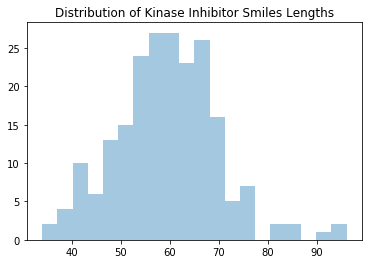

In [69]:
seaborn.distplot(length,bins=20,kde=False).set_title('Distribution of Kinase Inhibitor Smiles Lengths')

Text(0.5,1,'Distribution of Non-Kinase Inhibitor Smiles Lengths')

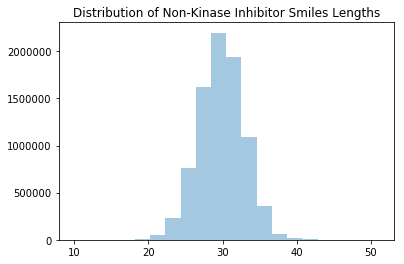

In [70]:
seaborn.distplot(non_inhib_lengths,bins=20,kde=False).set_title('Distribution of Non-Kinase Inhibitor Smiles Lengths')


Text(0.5,1,'Average Length of String by Molecule Type')

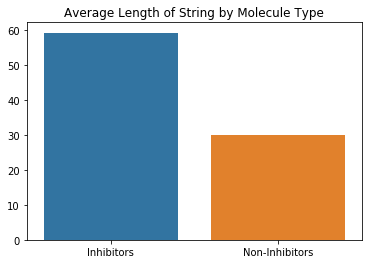

In [86]:
seaborn.barplot(["Inhibitors","Non-Inhibitors"],[average_inhib_length,average_non_inhib_length]).set_title("Average Length of String by Molecule Type")

In [84]:
seaborn.barplot(["Inhibitors","Non-Inhibitors"],[average_inhib_length,average_non_inhib_length]).set_title("Average Length of String by Molecule Type")

59.2122641509434

In [102]:
smiles_strings

0       CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4...
10      CN1CCN(CC1)c2ccc(cc2F)Nc3nc4c(cc[nH]4)c(n3)Oc5...
15      CC#CC(=O)N1CCC[C@H]1c2nc(c3n2ccnc3N)c4ccc(cc4)...
23      C[C@@H](c1nc2ccc(cc2c(=O)n1c3ccccc3)F)Nc4c5c(n...
29      Cc1ccc(cc1n2c(c(cn2)C(=O)c3cccc(c3)C#N)N)C(=O)...
34      CC(C)(c1cccc(n1)n2c3c(cnc(n3)Nc4ccc(cc4)N5CCN(...
43      CN(C)C/C=C/C(=O)Nc1cc2c(cc1O[C@H]3CCOC3)ncnc2N...
55      Cn1c(c(cn1)Cl)c2cc(sc2Cl)C(=O)N[C@@H](Cc3cccc(...
62      CCc1cc2c(cc1N3CCC(CC3)N4CCOCC4)C(c5c(c6ccc(cc6...
72      COc1cccc(c1C2=NCc3cnc(nc3-c4c2cc(cc4)Cl)Nc5ccc...
83      C=CC(=O)Nc1ccc2c(c1)c(ncn2)Nc3ccc(c(c3)Cl)OCc4...
88      Cc1c(sc(n1)NC(=O)N2CCC[C@H]2C(=O)N)c3ccnc(c3)C...
98      c1cc(ccc1NC(=O)C2(CC2)C(=O)Nc3cc(c(cc3F)Oc4ccn...
105     CN1CC[C@@H]([C@@H](C1)O)c2c(cc(c3c2oc(cc3=O)c4...
122     CCN(CC)CCNC(=O)c1c(c([nH]c1C)/C=C\2/c3cc(ccc3N...
127     c1ccc2c(c1)c3c(o2)c(ncn3)N4CCN(CC4)C(=S)NCc5cc...
135     Cc1cc2c([nH]1)ccc(c2F)Oc3ccnc4c3cc(c(c4)OCC5(C...
143        N#C

In [91]:
inhibitors = pd.DataFrame(smiles_strings,columns=['Inhibitor_Smiles'])

In [199]:
non_inhibitors = pd.DataFrame(non_inhibitors,columns=['Non-Inhibitor_Smiles'])
non_inhibitors

,Non-Inhibitor_Smiles
0,BrC1=C2C3=C4C(CC3CCC2=O)C(=N)NC4=N1
1,BrC1=C2C3C4CCC(C4)C3C(=N)OC2=NC=C1
2,BrC1=C2C3C4CCC(O4)C3(OC2=NC=C1)C#C
3,BrC1=C2C3C4CNC(C4)(C#N)C3OC2=NC=C1
4,BrC1=C2C3=C4C(OC(=O)C4=CC2=O)=CC3=NO1
5,BrC1=C2C3CC4CCC(C4)N3CC2=CSC1=N
6,BrC1=C2C3=CC4=CC=CN4C3=NC=C2N=CO1
7,BrC1=C2C3CC4COC(O4)C3CC2=COC1=O
8,BrC1=C2C3CC(C2=CC=C1)C1(OC=NC31)C=O
9,BrC1=C2C3C(CC2=CC=N1)C1CNC3(C1)C#C


In [101]:
non_inhibitors.to_csv('Downloads/mol-cycle-gan-master/non_inhib.csv')
inhibitors.to_csv('Downloads/mol-cycle-gan-master/inhib.csv')

In [103]:
with open('Downloads/mol-cycle-gan-master/data/input_data','rb') as file:
    zing = file.readlines()

IOError: [Errno 2] No such file or directory: 'Downloads/mol-cycle-gan-master/data/zinc/all.txt'

In [105]:
zinc = pd.read_csv('Downloads/mol-cycle-gan-master/data/input_data/250k_rndm_zinc_drugs_clean_3_canonized.csv')

In [107]:
zinc.columns

Index([u'smiles', u'logP', u'qed', u'SAS'], dtype='object')

In [108]:
length = [len(x) for x in zinc['smiles'].values]

Text(0.5,1,'Original Zinc Lengths')

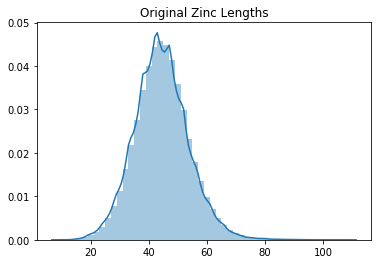

In [150]:
seaborn.distplot(length).set_title("Original Zinc Lengths")

In [143]:
zinc_results = pd.read_csv('Downloads/mol-cycle-gan-master/data/results/aromatic_rings/smiles_list_B_to_A.csv').fillna('')

In [112]:
zinc.columns

Index([u'SMILES'], dtype='object')

In [144]:
zinc_2_lengths = [len(x) for x in zinc_results['SMILES'].values]

In [135]:
zinc_2 = [x for x in zinc_results['SMILES'].values]

In [142]:
zinc_2

['CC(C)[NH2+]C[C@](C)(OCc1cc2c(cc1F)OCCO2)c1cccs1',
 'COc1ccc(C(=O)N(C)C[C@@H](O)c2ccc(C(N)=S)cc2)cc1F',
 'Cc1ccc(NCC(=O)Nc2ccccc2C(=O)N2CC[C@H](c3ccc(C)cc3)C2)cc1',
 'CCCC(=O)Nc1ccccc1C(=S)NCc1cnc(-c2ccccc2)o1',
 'O=C1CSCN1CCNC(=O)N1C[C@H]2CCCC[C@@H]2C1',
 'CCOC(=O)CNc1nc(CC(=O)OC)cs1',
 'CC[NH2+]Cc1ccccc1NC(=O)[C@@H]1CCCC[C@H]1C',
 'CC(=O)c1ccc(S(=O)(=O)N2CCCC[C@H]2c2ccccc2Cl)cc1',
 'O=C(CCc1ccc(F)cc1F)Nc1ccc(O)cc1',
 'Cc1cc(C(=O)N[C@H]2CC(=O)N(C)C2)n(CC(C)C)n1',
 'CNS(=O)(=O)c1c(OC)ccc([C@@]2(C(=O)Nc3cnoc3)CCOC(C)(C)C2)c1C',
 'COc1ccc(OC)c([C@@H](C)NC(=O)Cc2cccc3ccccc23)c1',
 'CCOc1ccc2[nH]c(C)cc2c1S(C)(=O)=O',
 'CCc1ccc(NC(=O)Cc2sc3c(c2C)CC=NN3CC(=O)OC)cc1',
 'Cc1nn(C(C)C)c(-n2cccc2)c1C(=O)Nc1nc2cc3c(cc2s1)OCCO3',
 'CCCN(CC)c1cc[nH+]c(C(=O)[O-])c1',
 'N#Cc1ccnc(N2CCC([NH2+]C[C@@H]3CCCO3)CC2)c1',
 'O=C(Nc1nnc(Cc2ccc(F)cc2)s1)C1CCC1',
 'CC(=O)Nc1nc2ccc(NCC(=O)Nc3ccccc3)cc2s1',
 'C[C@@H](CC(=O)NC1(C(=O)OCc2ccccc2)CCSCC1)c1ccccc1',
 'Cc1ccc([N+](=O)[O-])cc1NC(=O)C(=O)N[C@@H]1C[C@@H]2CC

In [141]:
zinc_2_len = [len(x) for x in zinc_2]

TypeError: object of type 'float' has no len()

Text(0.5,1,'Converted Zinc')

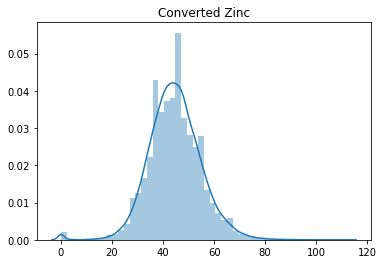

In [146]:
seaborn.distplot(zinc_2_lengths).set_title('Converted Zinc')

In [147]:
zinc_results = pd.read_csv('Downloads/mol-cycle-gan-master/data/results/aromatic_rings/smiles_list_A_to_B.csv').fillna('')

In [148]:
zinc_results_lengths = [len(x) for x in zinc_results['SMILES'].values]

Text(0.5,1,'UNConverted Zinc')

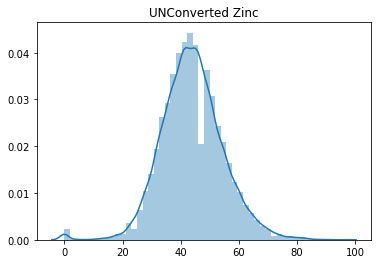

In [149]:
seaborn.distplot(zinc_results_lengths).set_title('UNConverted Zinc')

In [238]:
smiles['string_split'] = smiles['string_raw'].apply(lambda x: str(x.split('Smiles=')[1]) if 'Smiles=' in x else str(x))

/anaconda2/envs/mol-cycle-gan/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
!pip install pysmiles

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 112kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 1.7MB 36.7MB/s eta 0:00:01
  Created wheel for pysmiles: filename=pysmiles-1.0.0-py2.py3-none-any.whl size=21575 sha256=5c0c30842d3acd44041a127d0377cc923e18f6223c696d0eec6c6257ac335669
  Stored in directory: /Users/stevenagajanian/Library/Caches/pip/wheels/81/91/2d/56f763f02cc0695916ade9725dfdfc012d6e599d131253a554
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1527320 sha256=8e10ec3ce0ab425cfff0bc4e8f7c9f8eae0fa3aa7ce77304ca824603605fecff
  Stored in directory: /Users/stevenagajanian/Library/Caches/pip/wheel

In [223]:
import pysmiles
from collections import Counter
import matplotlib

In [194]:
mol = pysmiles.read_smiles(smiles['string_split'].iloc[1])
for i in mol.nodes(data='element'):
    print i

(0, 'C')
(1, 'N')
(2, 'C')
(3, 'C')
(4, 'N')
(5, 'C')
(6, 'C')
(7, 'C')
(8, 'C')
(9, 'C')
(10, 'C')
(11, 'C')
(12, 'C')
(13, 'F')
(14, 'N')
(15, 'C')
(16, 'N')
(17, 'C')
(18, 'C')
(19, 'C')
(20, 'C')
(21, 'N')
(22, 'C')
(23, 'N')
(24, 'O')
(25, 'C')
(26, 'C')
(27, 'C')
(28, 'C')
(29, 'C')
(30, 'C')
(31, 'N')
(32, 'C')
(33, 'O')
(34, 'C')
(35, 'C')


In [196]:
stats_strings = smiles['string_split'].values
counter = {}
for i in range(stats_strings.shape[0]):
    temp = Counter(stats_strings[i])
    mol = pysmiles.read_smiles(smiles['string_split'].iloc[i])
    for j in mol.nodes(data='element'):
        if j[1] not in counter:
            counter[j[1]] = 1
        else:
            counter[j[1]]+=1

I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I can't deal with stereo yet...
I can't deal with stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I can't deal with stereo yet...
I can't deal with stereo yet...
I can't deal with stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I can't deal with stereo yet...
I can't deal with stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how to handle stereo yet...
I don't quite know how t

In [208]:
#stats_strings_non_inhib = non_inhibitors['Non-Inhibitor_Smiles'].values
counter_non_inhib = {}
non_inhib_temp = non_inhibitors.sample(frac=.001)
for i in range(non_inhib_temp.shape[0]):
    mol = pysmiles.read_smiles(non_inhib_temp['Non-Inhibitor_Smiles'].iloc[i])
    for j in mol.nodes(data='element'):
        if j[1] not in counter_non_inhib:
            counter_non_inhib[j[1]] = 1
        else:
            counter_non_inhib[j[1]]+=1

In [210]:
counter_non_inhib

{'Br': 497,
 'C': 103934,
 'Cl': 189,
 'F': 493,
 'I': 98,
 'N': 17424,
 'O': 14970,
 'S': 2015}

In [211]:
counter

{'Br': 6,
 'C': 5041,
 'Cl': 65,
 'F': 175,
 'I': 4,
 'N': 1142,
 'O': 522,
 'P': 3,
 'S': 47}

In [212]:
total = sum(counter.values())
new_counter = {}
for i in counter.keys():
    new_counter[i] = counter[i]/(total*1.0)

In [213]:
new_counter

{'Br': 0.0008565310492505353,
 'C': 0.7196288365453247,
 'Cl': 0.009279086366880799,
 'F': 0.024982155603140613,
 'I': 0.0005710206995003569,
 'N': 0.16302640970735188,
 'O': 0.07451820128479657,
 'P': 0.00042826552462526765,
 'S': 0.0067094932191291935}

In [214]:
total_non_inhib = sum(counter_non_inhib.values())
new_counter_non_inhib = {}
for i in counter_non_inhib.keys():
    new_counter_non_inhib[i] = counter_non_inhib[i]/(total_non_inhib*1.0)

In [215]:
new_counter

{'Br': 0.0008565310492505353,
 'C': 0.7196288365453247,
 'Cl': 0.009279086366880799,
 'F': 0.024982155603140613,
 'I': 0.0005710206995003569,
 'N': 0.16302640970735188,
 'O': 0.07451820128479657,
 'P': 0.00042826552462526765,
 'S': 0.0067094932191291935}

In [217]:
new_counter_non_inhib['P'] = 0
new_counter_non_inhib

{'Br': 0.0035596619395502076,
 'C': 0.7444062455235639,
 'Cl': 0.0013536742587021916,
 'F': 0.003531012748889844,
 'I': 0.0007019051711789142,
 'N': 0.1247958745165449,
 'O': 0.1072195960464117,
 'P': 0,
 'S': 0.014432029795158287}

In [220]:
df = pd.DataFrame()
df['X'] = new_counter_non_inhib.keys()
non_inhib_freq = []
inhib_freq = []
for i in new_counter_non_inhib.keys():
    non_inhib_freq.append(new_counter_non_inhib[i])
    inhib_freq.append(new_counter[i])
df['non_inhib'] = non_inhib_freq
df['inhib'] = inhib_freq

In [226]:
df.plot(x='X',y=['non_inhib','inhib'])

ImportError: matplotlib is required for plotting.

In [225]:
import matplotlib.pyplot as plt

In [227]:
!conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: //anaconda2/envs/mol-cycle-gan

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         143 KB  conda-forge
    certifi-2019.9.11          |           py27_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         290 KB

The following packages will be UPDATED:

  ca-certificates                      2019.6.16-hecc5488_0 --> 2019.9.11-hecc5488_0
  certifi                                  2019.6.16-py27_1 --> 2019.9.11-py27_0


Proceed ([y]/n)? ^C

CondaSyst

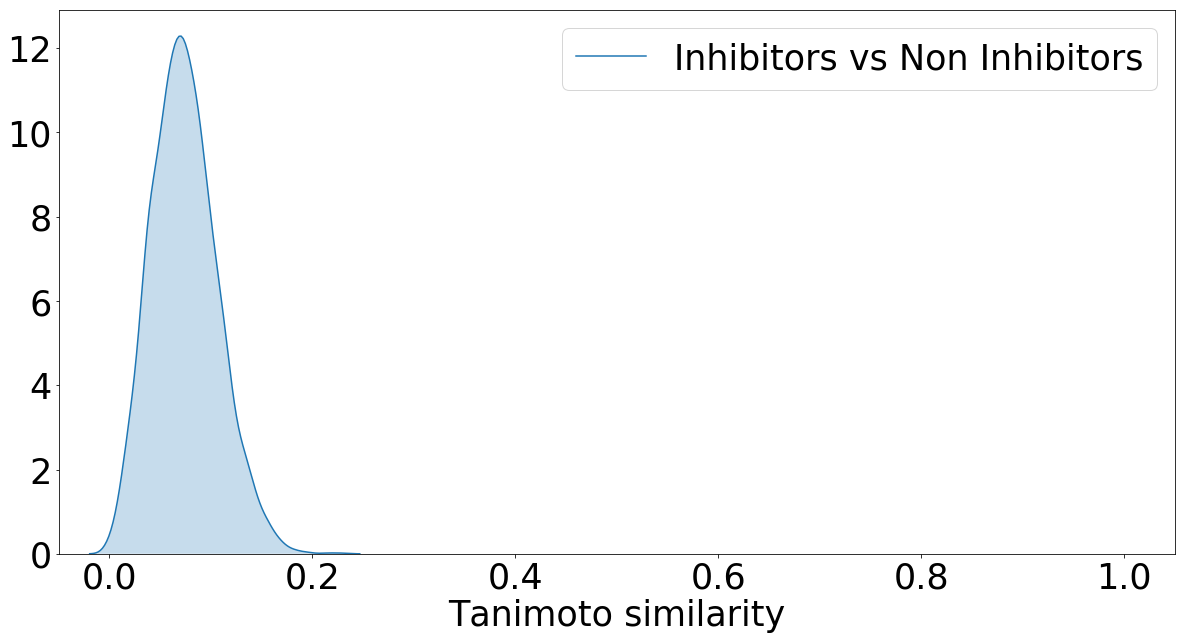

In [299]:
inhib_test = pd.concat([smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles,smiles])
sample = non_inhib_temp.sample(inhib_test.shape[0])
distances_A_to_B = create_tanimoto_column(inhib_test['string_split'].values, sample['Non-Inhibitor_Smiles'].values)

#zinc_smiles = pd.read_csv('../data/input_data/250k_rndm_zinc_drugs_clean_3_canonized.csv')[['smiles']].values.reshape(-1,)
#indices = np.random.permutation(zinc_smiles.shape[0])
#indices = indices[0:smiles_A.shape[0]]
#distances_A_to_B_random = create_tanimoto_column(smiles_A, zinc_smiles[indices])
    

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 35})
sns.kdeplot(distances_A_to_B, shade=True, label='Inhibitors vs Non Inhibitors')
#sns.kdeplot(distances_A_to_B_random, shade=True, label='A vs random')

plt.xlabel('Tanimoto similarity')
plt.xlim((-0.05, 1.05))
plt.legend()
pd.DataFrame(distances_A_to_B).to_excel('/Users/stevenagajanian/Downloads/mol-cycle-gan-master/tanimoto_similarities2.xlsx')

In [291]:
distances_A_to_B[0]

0.1079136690647482

In [262]:
def create_tanimoto_column(smiles_A, smiles_B):
    df_smiles = pd.DataFrame({'A': smiles_A, 'B': smiles_B})
    df_smiles = df_smiles.iloc[np.logical_and(df_smiles['A'].values != 'nan',
                                              df_smiles['B'].values != 'nan')]

    df_smiles.dropna(inplace=True)
    smiles_A = df_smiles.A
    smiles_B = df_smiles.B

    smiles_A_mol = [Chem.MolFromSmiles(x) for x in smiles_A]
    smiles_B_mol = [Chem.MolFromSmiles(x) for x in smiles_B]

    smiles_A_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in smiles_A_mol]
    smiles_B_fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in smiles_B_mol]

    tanimoto = np.array([DataStructs.TanimotoSimilarity(fp1, fp2)
                         for (fp1, fp2)
                         in zip(smiles_A_fps, smiles_B_fps)])

    return tanimoto

In [286]:
smiles['string_test'] = smiles['string_split'].apply(lambda x: x+'[O]')

In [287]:
smiles['string_test']

0                                        CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4)F)nc(n5C(C)C)C)F[O]
10                                       CN1CCN(CC1)c2ccc(cc2F)Nc3nc4c(cc[nH]4)c(n3)Oc5cccc(c5)NC(=O)C=C[O]
15                                          CC#CC(=O)N1CCC[C@H]1c2nc(c3n2ccnc3N)c4ccc(cc4)C(=O)Nc5ccccn5[O]
23                                             C[C@@H](c1nc2ccc(cc2c(=O)n1c3ccccc3)F)Nc4c5c(nc[nH]5)ncn4[O]
29                                                  Cc1ccc(cc1n2c(c(cn2)C(=O)c3cccc(c3)C#N)N)C(=O)NC4CC4[O]
34                                     CC(C)(c1cccc(n1)n2c3c(cnc(n3)Nc4ccc(cc4)N5CCN(CC5)C)c(=O)n2CC=C)O[O]
43                                         CN(C)C/C=C/C(=O)Nc1cc2c(cc1O[C@H]3CCOC3)ncnc2Nc4ccc(c(c4)Cl)F[O]
55                                                 Cn1c(c(cn1)Cl)c2cc(sc2Cl)C(=O)N[C@@H](Cc3cccc(c3)F)CN[O]
62                                     CCc1cc2c(cc1N3CCC(CC3)N4CCOCC4)C(c5c(c6ccc(cc6[nH]5)C#N)C2=O)(C)C[O]
72                          